# Reproducing Figure 3A-D and in-text result 1

This notebook aims to reproduce Figures 3A-D and in-text result 1 from Shoaib M, Ramamohan V. **Simulation modeling and analysis of primary health center operations**. *SIMULATION* 98(3):183-208. (2022). <https://doi.org/10.1177/00375497211030931>.

![Figure 3A](../../original_study/fig3a.png){.lightbox}

![Figure 3B](../../original_study/fig3b.png){.lightbox}

![Figure 3C](../../original_study/fig3c.png){.lightbox}

![Figure 3D](../../original_study/fig3d.png){.lightbox}

In-text result 1:

> "We also note that waiting times for **outpatient-related resources** (laboratory, OPD consultation, etc. - not depicted in Figures 3a – 3d) **increase marginally** because the associated resources are also required by inpatient/childbirth/ANC cases, which increase in number in the above scenarios"

## Parameters

In these figures, we vary configuration 1 as follows:

* **Number of inpatient/childbirth/ANC cases per day**:
    * 1 = IAT 1440 (e.g. like IPD cases for config1)
    * 2 = IAT 720 (as 2880 is 0.5 per day and 1440 is 1 per day)
* **Average service time for outpatients**:
    * 0.87 (0.21) (same as config1)
    * 2.5 (0.5) (as in figure 2)

## Set up

In [1]:
# To run model
import PHC

# To import results and produce figures
from reproduction_helpers import process_results
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# To speed up run time
from multiprocessing import Pool

# Additional package to record runtime of this notebook
import time
start = time.time()

In [2]:
# Paths to save image files to
output_folder = '../outputs'
fig3a_path = os.path.join(output_folder, 'fig3a.png')
fig3b_path = os.path.join(output_folder, 'fig3b.png')
fig3c_path = os.path.join(output_folder, 'fig3c.png')
fig3d_path = os.path.join(output_folder, 'fig3d.png')
txt1_path = os.path.join(output_folder, 'intext1.csv')

## Run model

In [3]:
# Varying number of inpatient, childbirth and ANC cases
arr_dict = [
    {
        'IPD_iat': 1440,
        'delivery_iat': 1440,
        'ANC_iat': 1440,
        'rep_file': 'arr111'
    },
    {
        'IPD_iat': 720,
        'delivery_iat': 1440,
        'ANC_iat': 1440,
        'rep_file': 'arr211',
    },
    {
        'IPD_iat': 720,
        'delivery_iat': 720,
        'ANC_iat': 720,
        'rep_file': 'arr222',
    }
]

# Varying service time
serv_dict = [
    {
        'mean': 0.87,
        'sd': 0.21,
        'consult_boundary_1': 0.5,  # From PHC.py
        'consult_boundary_2': 0.3,  # From PHC.py
        'rep_file': 'serv087'
    },
    {
        'mean': 2.5,
        'sd': 0.5,
        'consult_boundary_1': 1,  # From Figure 2 (which was a guess)
        'consult_boundary_2': 1,  # From Figure 2 (which was a guess)
        'rep_file': 'serv25'
    }
]

Create each combination for the reproduction

In [4]:
dict_list = []
for arr in arr_dict:
    for serv in serv_dict:
        # Combine the dictionaries
        comb = {**arr, **serv}
        # Replace the file name
        comb['rep_file'] = f'''f3_{arr['rep_file']}_{serv['rep_file']}.xls'''
        # Save to list
        dict_list.append(comb)

len(dict_list)

6

In [5]:
# Append 's_' to all items
for i, d in enumerate(dict_list):
    dict_list[i] = {f's_{k}': v for k, v in d.items()}

# Preview example
dict_list[0]

{'s_IPD_iat': 1440,
 's_delivery_iat': 1440,
 's_ANC_iat': 1440,
 's_rep_file': 'f3_arr111_serv087.xls',
 's_mean': 0.87,
 's_sd': 0.21,
 's_consult_boundary_1': 0.5,
 's_consult_boundary_2': 0.3}

Run the model (with parallel processing to reduce run time)

In [6]:
# Wrapper function to allow input of dictionary with pool
def wrapper(d):
    return PHC.main(**d)

# Create a process pool that uses all CPUs
with Pool() as pool:
    # Run PHC.main() using each of inputs from config
    pool.map(wrapper, dict_list)

 No of replications done 0
 No of replications done 0
 No of replications done 0
 No of replications done 0
 No of replications done 0
 No of replications done 0
 No of replications done 1
 No of replications done 1
 No of replications done 1
 No of replications done 1
 No of replications done 1
 No of replications done 1
 No of replications done 2
 No of replications done 2
 No of replications done 2
 No of replications done 2
 No of replications done 2
 No of replications done 2
 No of replications done 3
 No of replications done 3
 No of replications done 3
 No of replications done 3
 No of replications done 3
 No of replications done 3
 No of replications done 4
 No of replications done 4
 No of replications done 4
 No of replications done 4
 No of replications done 4
 No of replications done 4
 No of replications done 5
 No of replications done 5
 No of replications done 5
 No of replications done 5
 No of replications done 5
 No of replications done 5
 No of replications done 6
 

## Process results

Function for reshaping these as repeat a few times

In [7]:
def reshape_087_25(s):
    '''
    Reshapes series that has results from scenarios including mean 0.87 and 2.5
    to produce a 3 x 2 dataframe where rows are consultation time and columns
    are the arrivals

    Parameters:
    -----------
    s : series
        Series with results from figure 3 model variants

    Returns:
    --------
    res : dataframe
        Dataframe where rows are consultation time and columns are arrivals
    '''
    # Reshape data so in appropriate format for plotting grouped bar chart
    names = ['0.87 (0.21)', '2.5 (0.5)']
    s111 = [s['f3_arr111_serv087'], s['f3_arr111_serv25']]
    s211 = [s['f3_arr211_serv087'], s['f3_arr211_serv25']]
    s222 = [s['f3_arr222_serv087'], s['f3_arr222_serv25']]

    res = pd.DataFrame(
        {'(1/1/1)': s111, '(2/1/1)': s211, '(2/2/2)': s222}, index=names)

    return res

In [8]:
def plot_087_25(df, ylab, ylim=False, save_path=False):
    '''
    Plots results from varying cases and consultation time

    Parameters:
    -----------
    df : pd.DataFrame
        Dataframe reshaped using reshape_087_25()
    '''
    # Plot data
    ax = df.plot.bar(edgecolor='black', color='white', width=0.7)

    # Add patterns
    bars = ax.patches
    pattern = np.repeat(['++', '\\\\\\\\', '//////'], 2)
    for bar, hatch in zip(bars, pattern):
        bar.set_hatch(hatch)
    ax.legend(title='Inpatient/Childbirth/ANC cases per day')

    # Adjust figure
    plt.xlabel('Consultation time (minutes): mean (SD)')
    plt.ylabel(ylab)
    plt.xticks(rotation=0)
    ax.grid(axis='y')
    if ylim:
        plt.ylim(ylim)
    ax.set_axisbelow(True)
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

## Create Figure 3A

In [9]:
# Import and process results
data_full = process_results([
    'f3_arr111_serv087', 'f3_arr211_serv087', 'f3_arr222_serv087',
    'f3_arr111_serv25', 'f3_arr211_serv25', 'f3_arr222_serv25'])

# Filter to doctor utilisation
a3 = data_full.loc['doc occ']
a3

f3_arr111_serv087    0.269200
f3_arr211_serv087    0.270328
f3_arr222_serv087    0.289834
f3_arr111_serv25     0.513831
f3_arr211_serv25     0.517641
f3_arr222_serv25     0.537557
Name: doc occ, dtype: float64

In [10]:
# Reshape data so in appropriate format for plotting grouped bar chart
data_3a = reshape_087_25(a3)
data_3a

,(1/1/1),(2/1/1),(2/2/2)
0.87 (0.21),0.269200,0.270328,0.289834
2.5 (0.5),0.513831,0.517641,0.537557


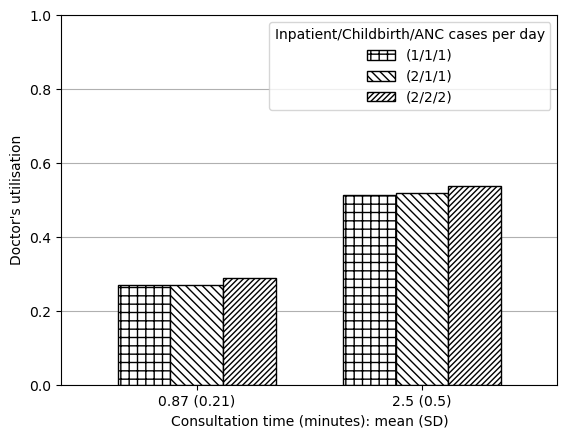

In [11]:
plot_087_25(data_3a, ylab='''Doctor's utilisation''',
            ylim=[0,1], save_path=fig3a_path)

## Creating Figure 3B

In [12]:
# Filter to staff nurse utilisation and config1 (0.87)
data_3b = data_full.loc[
    'staff nurse occ', data_full.columns.str.endswith('087')]
# Rename index
data_3b = data_3b.rename(index={'f3_arr111_serv087': '(1/1/1)',
                                'f3_arr211_serv087': '(2/1/1)',
                                'f3_arr222_serv087': '(2/2/2)'})
data_3b

(1/1/1)    0.343989
(2/1/1)    0.378359
(2/2/2)    0.532546
Name: staff nurse occ, dtype: float64

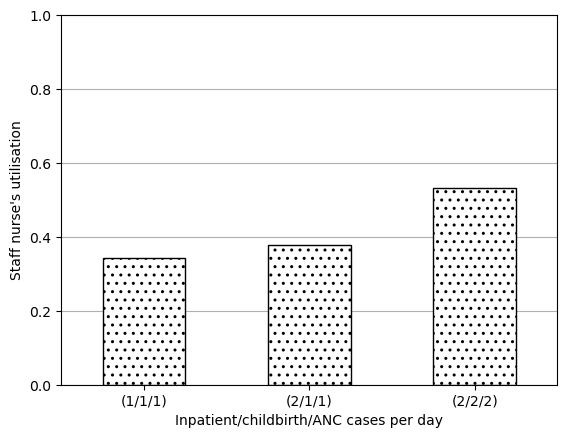

In [13]:
ax = data_3b.plot.bar(edgecolor='black', color='white', hatch='..')
plt.xlabel('Inpatient/childbirth/ANC cases per day')
plt.ylabel('''Staff nurse's utilisation''')
plt.ylim(0, 1)
plt.xticks(rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.savefig(fig3b_path, bbox_inches='tight')
plt.show()

## Creating Figure 3C

In [14]:
# Filter to inpatient bed utilisation and config1 (0.87)
data_3c = data_full.loc[
    'ipd bed occ', data_full.columns.str.endswith('087')]
# Rename index
data_3c = data_3c.rename(index={'f3_arr111_serv087': '(1/1/1)',
                                'f3_arr211_serv087': '(2/1/1)',
                                'f3_arr222_serv087': '(2/2/2)'})
data_3c

(1/1/1)    0.107832
(2/1/1)    0.129961
(2/2/2)    0.186271
Name: ipd bed occ, dtype: float64

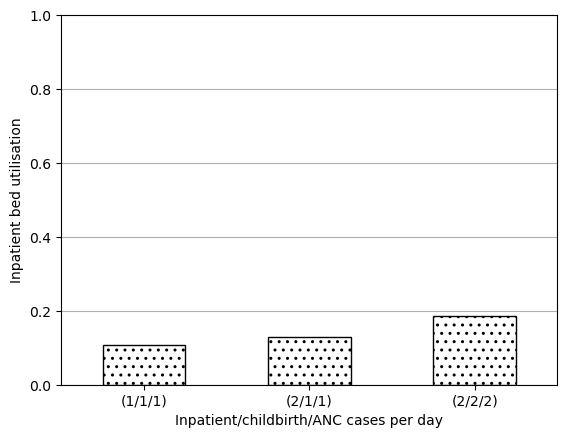

In [15]:
ax = data_3c.plot.bar(edgecolor='black', color='white', hatch='..')
plt.xlabel('Inpatient/childbirth/ANC cases per day')
plt.ylabel('Inpatient bed utilisation')
plt.ylim(0, 1)
plt.xticks(rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.savefig(fig3c_path, bbox_inches='tight')
plt.show()

## Creating Figure 3D

In [16]:
# Filter to proportion of childbirth cases referred and config1 (0.87)
data_3d = data_full.loc[
    'prop_del_referred', data_full.columns.str.endswith('087')]
# Rename index
data_3d = data_3d.rename(index={'f3_arr111_serv087': '(1/1/1)',
                                'f3_arr211_serv087': '(2/1/1)',
                                'f3_arr222_serv087': '(2/2/2)'})
data_3d

(1/1/1)    0.151000
(2/1/1)    0.143832
(2/2/2)    0.271968
Name: prop_del_referred, dtype: float64

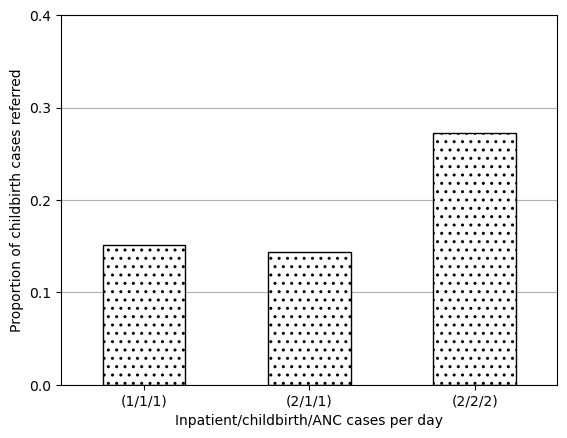

In [17]:
ax = data_3d.plot.bar(edgecolor='black', color='white', hatch='..')
plt.xlabel('Inpatient/childbirth/ANC cases per day')
plt.ylabel('Proportion of childbirth cases referred')
plt.yticks(np.arange(0, 0.5, 0.1))
plt.xticks(rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.savefig(fig3d_path, bbox_inches='tight')
plt.show()

## Reproducing in-text result 1

This result refers to "waiting times for outpatient-related resources (laboratory, OPD consultation, etc.)". I assume this to refer to:

* OPD queue waiting time (minutes)
* Lab queue waiting time (minutes)

In [18]:
# Get OPD queue time
data_txt1_opd = reshape_087_25(data_full.loc['OPD Q wt'])
data_txt1_opd['Output'] = 'OPD queue waiting time (minutes)'

# Get lab queue time
data_txt1_lab = reshape_087_25(data_full.loc['Lab Q wt'])
data_txt1_lab['Output'] = 'Lab queue waiting time (minutes)'

# Combine, round, save and show dataframe
data_txt1 = round(pd.concat([data_txt1_opd, data_txt1_lab]), 3)
data_txt1.index.names = ['Consultation time: mean (SD)']
data_txt1.to_csv(txt1_path)
data_txt1

,(1/1/1),(2/1/1),(2/2/2),Output
Consultation time: mean (SD),,,,
0.87 (0.21),0.011,0.010,0.023,OPD queue waiting time (minutes)
2.5 (0.5),0.121,0.124,0.158,OPD queue waiting time (minutes)
0.87 (0.21),2.069,2.070,2.110,Lab queue waiting time (minutes)
2.5 (0.5),2.314,2.322,2.308,Lab queue waiting time (minutes)


Produced figures but, due to the very small amount of change observed in minutes, feel it is misleading, so will just save table.

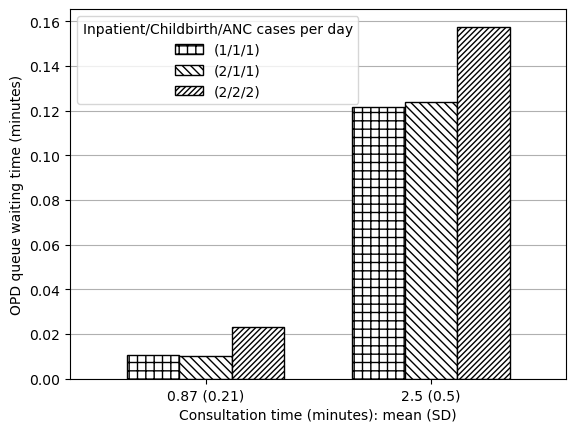

In [19]:
plot_087_25(data_txt1_opd, ylab='OPD queue waiting time (minutes)')

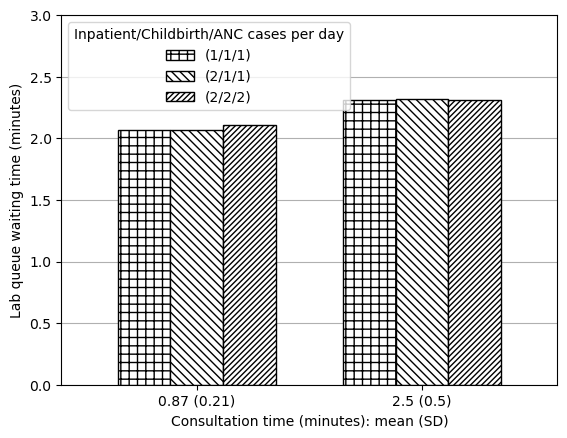

In [20]:
plot_087_25(data_txt1_lab, ylim=[0, 3], ylab='Lab queue waiting time (minutes)')

## Run time

In [21]:
# Find run time in seconds
end = time.time()
runtime = round(end-start)

# Display converted to minutes and seconds
print(f'Notebook run time: {runtime//60}m {runtime%60}s')

Notebook run time: 2m 45s
